In [ ]:
import include.init_rocket.MyRocket as rckt

%run -i widgets/widgets.py

## Motor picker

### Load data

In [1]:
import json
import matplotlib.pyplot as plt
import ipywidgets as widgets


f = open('data.json')
data = json.load(f)

The motors have the following attributes : 
- availability
- average thrust
- burn times
- common name
- designation
- diameter
- impulse class 
- manufacturer
- max thrust
- motor ID
- propellant info
- propellant weight
- thrust curve

### Impulse class : 
The <b>impulse class</b> is a letter code assigned to a range of total impulse with each letter being twice as powerful as the previous.<br><br>
A : 1.26–2.50 (N.s),
B: 2.51–5.00,
C : 5.01–10.0,
D: 10.01–20.0,
E: 20.01–40.0,
F: 40.01–80.0,
G: 80.01–160,
H: 160.01–320,
I: 320.01–640,
J: 640.01–1,280,
K: 1,280.01–2,560,
L: 2,560.01–5,120,
M: 5,120.01–10,240,
N: 10,240.01–20,480,
O: 20,480.01–40,960

In [41]:
impulseClass = widgets.Select(
    options=[("[1.26 - 2.50]",'A'),
             ("[2.51 - 5.00]",'B'),
             ("[5.01 - 10.0]",'C'),
             ("[10.01 - 20.0]",'D'),
             ("[20.01 - 40.0]",'E'),
             ("[40.01 - 80.0]",'F'),
             ("[80.01 - 160]",'G'),
             ("[160.01 - 320]",'H'),
             ("[320.01 - 640]",'I'),
             ("[640.01 - 1280]",'J'),
             ("[1,280.01 - 2,560]",'K'),
             ("[2,560.01 - 5,120]",'L'),
             ("[5,120.01 - 10,240]",'M'),
             ("[10,240.01 - 20,480]",'N'),
             ("[20,480.01 - 40,960]",'O')],
    description='impulse Class:',
    disabled=False
)
display(impulseClass)

Select(description='impulse Class:', options=(('[1.26 - 2.50]', 'A'), ('[2.51 - 5.00]', 'B'), ('[5.01 - 10.0]'…

### Diameter 
The main diameter of the motor in millimeters.

In [35]:
diameter = widgets.FloatRangeSlider(
    value=[6, 161],
    min=6,
    max=161,
    step=1,
    description='Diameter (mm):',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
diameter

FloatRangeSlider(value=(6.0, 161.0), continuous_update=False, description='Diameter (mm):', max=161.0, min=6.0…

### Possible motors according to selected attributes : 

In [38]:
motors = []
for motor in data:
    if motor['impulseClass']==impulseClass.value and motor['diameter']>diameter.value[0] and motor['diameter']<diameter.value[1]:
        motors.append(motor['designation'])

	
m = widgets.Select(
    options=[motor for motor in motors],
    description='designation:',
    disabled=False
)
m

Select(description='designation:', options=('K185W', 'K234-BG', '835CC125J-K240', 'K240H', 'K250-LW', 'K250W',…

### Thrust Curve : 

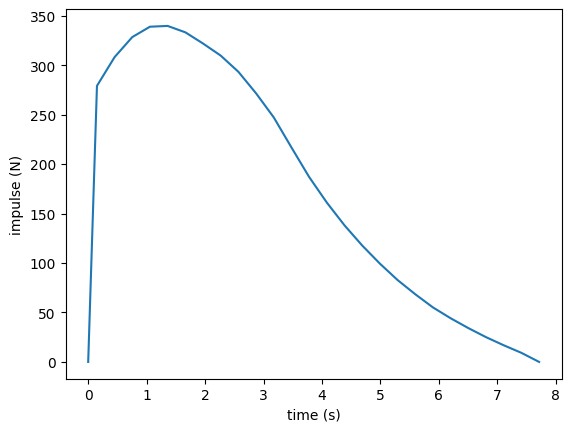

In [37]:
motor_name = m.value
d=[]
for elem in data:
	if elem['designation'] == motor_name:
		d = elem['samples']
		motor = elem
x = [d[i][0] for i in range(len(d))]
y = [d[i][1] for i in range(len(d))]

plt.plot(x,y)
plt.xlabel('time (s)')
plt.ylabel('impulse (N)')
plt.show()

### Motor infos : 


In [8]:
print(motor)

{'availability': 'regular', 'avgThrustN': 19.1, 'burnTimeS': 0.52, 'certOrg': 'Tripoli Rocketry Association, Inc.', 'commonName': 'C18', 'dataFiles': 2, 'delays': '4,6,8', 'designation': 'C18W', 'diameter': 18, 'impulseClass': 'C', 'length': 81, 'manufacturer': 'Quest Aerospace', 'manufacturerAbbrev': 'Quest', 'maxThrustN': 23.6, 'motorId': '5f7d2f71606b5d00041d9aba', 'propInfo': 'Fast White Lightning', 'propWeightG': 5.6, 'samples': [[0, 0], [0.013, 0.043], [0.022, 0.937], [0.03, 2.428], [0.039, 6.218], [0.044, 12.44], [0.052, 20.06], [0.059, 21.72], [0.071, 22.02], [0.08, 21.85], [0.088, 22.19], [0.122, 21.38], [0.132, 21.42], [0.143, 21.08], [0.152, 21.55], [0.167, 21.68], [0.177, 21.72], [0.187, 21.93], [0.197, 21.21], [0.218, 21.25], [0.225, 21.98], [0.232, 22.06], [0.241, 21.08], [0.247, 20.95], [0.261, 21.34], [0.268, 21.38], [0.277, 20.91], [0.294, 21.08], [0.313, 21.17], [0.324, 21.38], [0.331, 21.38], [0.34, 21.12], [0.347, 21.12], [0.356, 21.04], [0.363, 21.12], [0.377, 21.5